In [15]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
# Read in the raw text
rawData = open("SpamCollection.tsv").read()
# Print the raw data
rawData[0:250]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup fi"

In [5]:
import pandas as pd
# Reading Tab separated Value
data = pd.read_csv('SpamCollection.tsv', sep='\t', names=['label', 'body_text'], header=None)
# Print first 5 data
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [6]:
print("Input data has {} rows and {} columns".format(len(data), len(data.columns)))

Input data has 5568 rows and 2 columns


In [7]:
data['label'].value_counts()

ham     4822
spam     746
Name: label, dtype: int64

## Preprocessing Dataset

##### Remove punctuation

In [8]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


##### Tokenization

In [10]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [11]:
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords

In [12]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


#### Stemming

In [13]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]"


#### Lemmatizer

In [16]:
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

data['body_text_lemmatized'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))

data.head(10)

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop,body_text_stemmed,body_text_lemmatized
0,ham,I've been searching for the right words to tha...,Ive been searching for the right words to than...,"[ive, been, searching, for, the, right, words,...","[ive, searching, right, words, thank, breather...","[ive, search, right, word, thank, breather, pr...","[ive, searching, right, word, thank, breather,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entri, 2, wkli, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me T...,"[even, my, brother, is, not, like, to, speak, ...","[even, brother, like, speak, treat, like, aids...","[even, brother, like, speak, treat, like, aid,...","[even, brother, like, speak, treat, like, aid,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]","[date, sunday]","[date, sunday]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request Melle Melle Oru Minnaminun...,"[as, per, your, request, melle, melle, oru, mi...","[per, request, melle, melle, oru, minnaminungi...","[per, request, mell, mell, oru, minnaminungint...","[per, request, melle, melle, oru, minnaminungi..."
6,spam,WINNER!! As a valued network customer you have...,WINNER As a valued network customer you have b...,"[winner, as, a, valued, network, customer, you...","[winner, valued, network, customer, selected, ...","[winner, valu, network, custom, select, receiv...","[winner, valued, network, customer, selected, ..."
7,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more U R entitled...,"[had, your, mobile, 11, months, or, more, u, r...","[mobile, 11, months, u, r, entitled, update, l...","[mobil, 11, month, u, r, entitl, updat, latest...","[mobile, 11, month, u, r, entitled, update, la..."
8,ham,I'm gonna be home soon and i don't want to tal...,Im gonna be home soon and i dont want to talk ...,"[im, gonna, be, home, soon, and, i, dont, want...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf...","[im, gonna, home, soon, dont, want, talk, stuf..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",SIX chances to win CASH From 100 to 20000 poun...,"[six, chances, to, win, cash, from, 100, to, 2...","[six, chances, win, cash, 100, 20000, pounds, ...","[six, chanc, win, cash, 100, 20000, pound, txt...","[six, chance, win, cash, 100, 20000, pound, tx..."


### Saved Clean data

In [17]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.
data.to_csv("SpamCollection_cleaned.csv", sep=',')

#### Vectorizing Data: Bag-Of-Words


In [18]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100) # To extend column width

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

In [20]:
# Remove punct,token,stopworkds, and stem
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply CountVectorizer

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)

(5567, 8104)


In [23]:
X_counts

<5567x8104 sparse matrix of type '<class 'numpy.int64'>'
	with 50122 stored elements in Compressed Sparse Row format>

In [24]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
X_counts_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Vectorizing Raw Data: N-Grams

##### Apply CountVectorizer (N-Grams)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['body_text'])
print(X_counts.shape)


(5567, 8104)


In [27]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names())
X_counts_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Vectorizing Raw Data: TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)

(5567, 8104)


In [30]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])


                  0  008704050406  0089mi  0121  01223585236  01223585334  \
0     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
1     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
2     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
3     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
4     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
5     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
6     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
7     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
8     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
9     0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
10    0.000000  0.0           0.0     0.0   0.0          0.0          0.0   
11    0.000000  0.0           0.0     0.0   0.0          0.0          0.0   

#### Feature Engineering: Feature Creation

In [32]:
data = pd.read_csv("SpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

#### Create feature for text message length and % of punctuation in text

In [33]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


In [34]:
#For Visualizing to check if message body length and % of punctuation is good feature or not.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


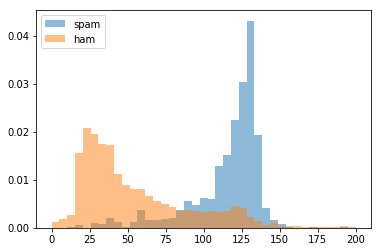

In [35]:
bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5, normed=True, label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5, normed=True, label='ham')
plt.legend(loc='upper left')
plt.show()

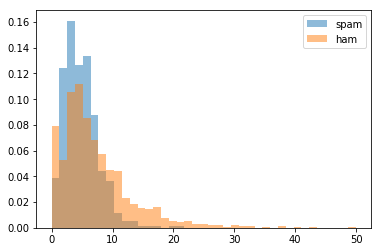

In [36]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, normed=True, label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, normed=True, label='ham')
plt.legend(loc='upper right')
plt.show()

### Building ML Classifiers:Model Selection Random Forest with GridSearchCV

In [37]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)

# CountVectorizer
count_vect = CountVectorizer(analyzer=clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis=1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/semaphore_tracker.py:74: UserWarning: semaphore_tracker: process died unexpectedly, relaunching.  Some semaphores might leak.
  warnings.warn('semaphore_tracker: process died unexpectedly, '
exception calling callback for <Future at 0x1220e7be0 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py", line 309, in __call__
    self.parallel.dispatch_next()
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py", line 731, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1)}

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/reduction.py", line 243, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/reduction.py", line 236, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py", line 284, in dump
    return Pickler.dump(self, obj)
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/us

In [39]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/semaphore_tracker.py:74: UserWarning: semaphore_tracker: process died unexpectedly, relaunching.  Some semaphores might leak.
  warnings.warn('semaphore_tracker: process died unexpectedly, '
/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/semaphore_tracker.py:74: UserWarning: semaphore_tracker: process died unexpectedly, relaunching.  Some semaphores might leak.
  warnings.warn('semaphore_tracker: process died unexpectedly, '
exception calling callback for <Future at 0x16ed4b208 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/parallel.py", line 309, in __call_

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1)}

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/queues.py", line 150, in _feed
    obj_ = dumps(obj, reducers=reducers)
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/reduction.py", line 243, in dumps
    dump(obj, buf, reducers=reducers, protocol=protocol)
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/backend/reduction.py", line 236, in dump
    _LokyPickler(file, reducers=reducers, protocol=protocol).dump(obj)
  File "/Users/cdavis/18Jan/venv/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py", line 284, in dump
    return Pickler.dump(self, obj)
  File "/usr/local/Cellar/python/3.7.2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/pickle.py", line 437, in dump
    self.save(obj)
  File "/us